##prepare the arts set

In [ ]:
import pandas as pd
import numpy as np
from numpy import array
import math

In [ ]:
artwork = pd.read_csv("artwork.csv")
artist = pd.read_csv("artistBirth19th2.csv")

In [ ]:
artists=artist['id'].tolist()
artwork=artwork[artwork['artist'].isin(artists)]

In [ ]:
artwork.to_csv('artwork19th.csv')

##extraction
Using the unsupervised tool K-means, we realize the main color extraction from arts. Here we extracted several 19th century arts as well as some 'classic' one, to have a intuitive view on if there's difference between them.

In [ ]:
import time
from functools import wraps
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2hsv, hsv2rgb
from skimage import transform
from skimage.io import imread
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [ ]:
# calculating time
def time_it(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        print(f"Spend time:{time.time() - start} s")
        return result

    return wrapper


In [ ]:
@time_it
def get_best_k(src):
    K_list = [i for i in range(2, 8)]
    scores = []
    for i in K_list:
        mbk = MiniBatchKMeans(n_clusters=i, random_state=0)
        scores.append(silhouette_score(src, mbk.fit_predict(src), sample_size=int(src.shape[0] / 128)))
    index = scores.index(max(scores))
    best_k = K_list[index]
    print(f'best_k:', best_k)
    return best_k

In [ ]:
def get_main_Color(src):
    # to_HSV
    img = rgb2hsv(src)
    h, w, d = img.shape
    img = np.reshape(img, (h * w, d))
    k = get_best_k(img)
    bk = MiniBatchKMeans(n_clusters=k, random_state=0)
    bk.fit(img)
    result = bk.cluster_centers_
    # to_RGB
    maincolor = hsv2rgb(result) * 255
    return maincolor

In [ ]:
def maincolor_show(maincolor):
    N = len(maincolor)
    img = np.zeros((300, 100 * N, 3), np.uint8)

    for i in range(N):
        img[:, 100 * i:100 * (i + 1)] = [maincolor[i]]
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [ ]:
list=["1.jpg","2.jpg","3.jpg","4.jpg","5.jpg","6.jpg"]

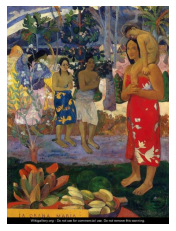

best_k: 7
Spend time:1.8488986492156982 s
[[ 27.44913614  52.58704267  51.44444264]
 [ 73.06450934  70.28199598  62.50667742]
 [182.83405147 162.13100087 128.65109623]
 [ 98.02507574  89.3266344  110.34976141]
 [162.66705144  99.896788    49.21142191]
 [183.68326293  24.39363735  30.7196934 ]
 [ 99.55433611  82.26243601  50.52933878]]


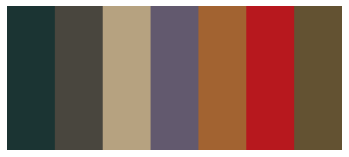

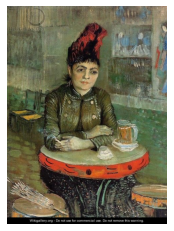

best_k: 2
Spend time:0.8157835006713867 s
[[118.2481592  117.82397685  78.15592708]
 [ 38.90284519  48.9435601   42.17213821]]


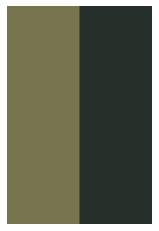

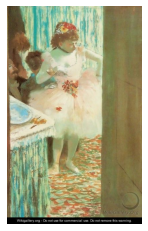

best_k: 2
Spend time:0.9285750389099121 s
[[126.3807918  116.94707437  72.67898155]
 [190.85143194 203.38373522 157.04637201]]


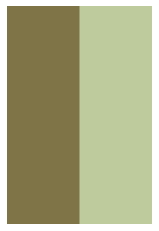

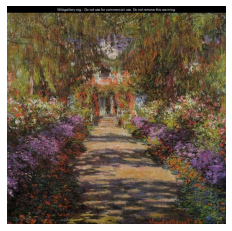

best_k: 2
Spend time:0.8136634826660156 s
[[96.05824014 80.40465647 55.97119217]
 [80.58284683 59.47908083 77.61219033]]


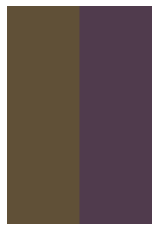

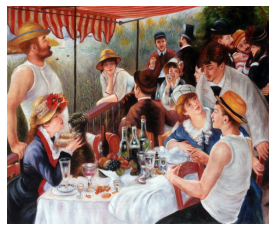

best_k: 5
Spend time:1.4082040786743164 s
[[177.86787317 166.26451715 146.42531341]
 [169.06160359  89.70194234  62.54852845]
 [ 48.48346826  38.20146542  60.00018048]
 [188.08269166 190.82758319 202.18040222]
 [ 54.62823584  39.23241725  24.6774636 ]]


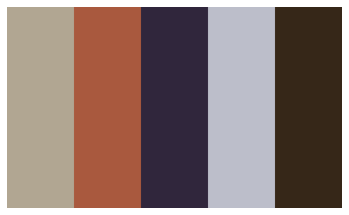

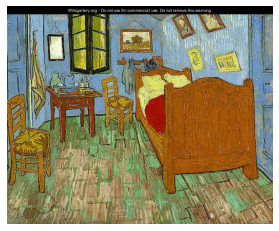

best_k: 3
Spend time:0.8875131607055664 s
[[147.06658391  90.51311457  17.89260976]
 [123.71398972 160.73296616 164.83086898]
 [132.90543192 130.11425702  83.23518699]]


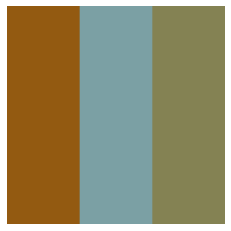

In [ ]:
def main():
    for art in list:
      src = imread(art)
      plt.imshow(src)
      plt.axis('off')
      plt.show()

      src = transform.rescale(src, [0.4, 0.4, 1])
      maincolor = get_main_Color(src)
      print(maincolor)
    # visualization
      maincolor_show(maincolor)


if __name__ == '__main__':
    main()

In [ ]:
list2=["01.jpg","02.jpg","03.jpg","04.jpg","05.jpg","06.jpg"]

In [ ]:
def main2():
    for art in list2:
      src = imread(art)
      plt.imshow(src)
      plt.axis('off')
      plt.show()

      src = transform.rescale(src, [0.4, 0.4, 1])
      maincolor = get_main_Color(src)
      print(maincolor)
    # visualization
      maincolor_show(maincolor)


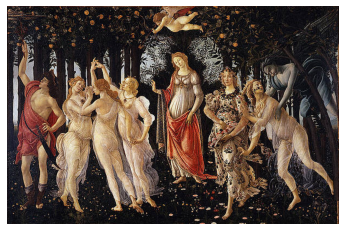

best_k: 2
Spend time:0.6112198829650879 s
[[ 29.42163315  25.41146046  32.46604137]
 [116.66004317  93.59022594  74.0431032 ]]


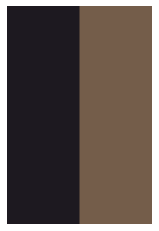

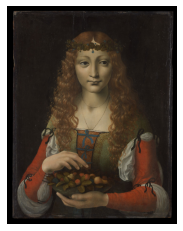

best_k: 5
Spend time:1.0475163459777832 s
[[135.11219467 118.92444235  89.03963327]
 [ 78.86677265  56.43938763  33.61833049]
 [ 38.43213696  32.31609669  36.55739702]
 [ 34.82521874  29.05950245  24.9953196 ]
 [  1.71360803   1.70754313   1.7074527 ]]


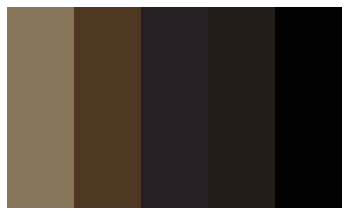

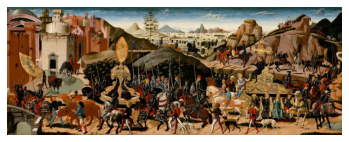

best_k: 5
Spend time:0.7773370742797852 s
[[ 65.81925232  39.70506625  10.71646657]
 [ 55.65183972  50.17231469  32.07030328]
 [152.75759546 105.97353364  60.36561822]
 [180.14350108 163.43772996 126.62848136]
 [ 66.70423856  90.22162177 104.964188  ]]


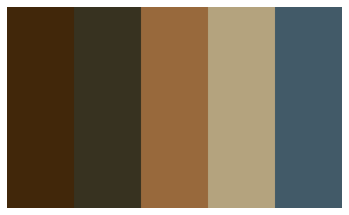

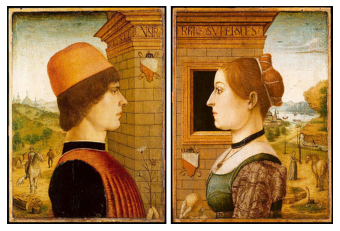

best_k: 2
Spend time:0.7674579620361328 s
[[197.00339754 186.85540915 140.30145235]
 [142.10313259  93.45732103  25.47611462]]


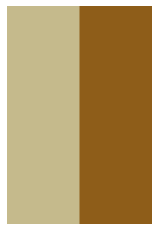

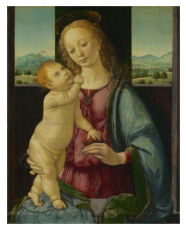

best_k: 7
Spend time:0.7565052509307861 s
[[171.74481407 148.59510969  89.04711737]
 [ 34.79825066  43.88915998  34.45725948]
 [ 52.41942493  45.13827919  18.10365293]
 [108.23282768 126.03035127  95.12990564]
 [ 60.13084967  19.7339522   21.25509447]
 [ 42.88839013  38.63519868  28.10045104]
 [124.47583707  93.70971409  51.70650806]]


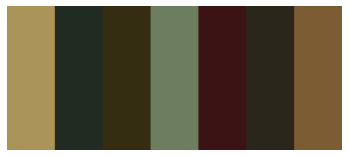

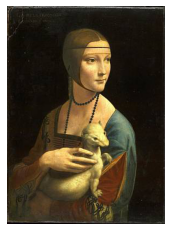

best_k: 2
Spend time:0.7669501304626465 s
[[ 36.35401986  29.99169088  18.11462726]
 [161.68028863 134.23065943  71.4347063 ]]


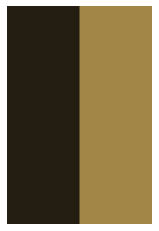

In [ ]:
main2()